# Part 1 Read Data and Static Visualization

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.__version__

'3.1.0'

In [86]:
User = pd.read_csv("user_table.csv")
Home = pd.read_csv("home_page_table.csv")
PayConfirm = pd.read_csv("payment_confirmation_table.csv")
Pay = pd.read_csv("payment_page_table.csv")
Search = pd.read_csv("search_page_table.csv")

In [87]:
# Check User Table
print(User.head(5))
print('\n\n\n')
print(User.dtypes)
print('\n\n\n')
print(User.describe(include = 'all'))
print('\n\n\n')
print(User['device'].value_counts())
print('\n\n\n')
print(User['sex'].value_counts())

   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male




user_id     int64
date       object
device     object
sex        object
dtype: object




              user_id        date   device    sex
count    90400.000000       90400    90400  90400
unique            NaN         120        2      2
top               NaN  2015-02-08  Desktop   Male
freq              NaN         877    60200  45325
mean    498709.683473         NaN      NaN    NaN
std     289040.674085         NaN      NaN    NaN
min         17.000000         NaN      NaN    NaN
25%     247978.750000         NaN      NaN    NaN
50%     498267.000000         NaN      NaN    NaN
75%     749789.250000         NaN      NaN    NaN
max     999979.000000         NaN      NaN    NaN




Desktop    60200
Mobile     30200
Name: device, dtype: int64



In [88]:
# Convert date to Datetime format
User['date'] = pd.to_datetime(User['date'], format="%Y-%m-%d")

In [89]:
# Check Home Table
print(Home.head(5))
print('\n\n\n')
print(Home.dtypes)
print('\n\n\n')
print(Home.describe(include = 'all'))
print('\n\n\n')

   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page




user_id     int64
page       object
dtype: object




              user_id       page
count    90400.000000      90400
unique            NaN          1
top               NaN  home_page
freq              NaN      90400
mean    498709.683473        NaN
std     289040.674085        NaN
min         17.000000        NaN
25%     247978.750000        NaN
50%     498267.000000        NaN
75%     749789.250000        NaN
max     999979.000000        NaN






In [90]:
# change column names
Home.rename(columns={'page': 'HomePage'}, inplace=True)
PayConfirm.rename(columns={'page': 'ConfirmPage'}, inplace=True)
Pay.rename(columns={'page': 'PayPage'}, inplace=True)
Search.rename(columns={'page': 'SearchPage'}, inplace=True)

In [91]:
# Merge tables
Funnel = User.merge(Home, on = 'user_id', how = 'outer').merge(Search, on = 'user_id', how = 'outer').merge(Pay, on = 'user_id', how = 'outer').merge(PayConfirm, on = 'user_id', how = 'outer')

In [92]:
Funnel.describe(include = 'all')

,user_id,date,device,sex,HomePage,SearchPage,PayPage,ConfirmPage
count,90400.000000,90400,90400,90400,90400,45200,6030,452
unique,NaN,120,2,2,1,1,1,1
top,NaN,2015-02-08 00:00:00,Desktop,Male,home_page,search_page,payment_page,payment_confirmation_page
freq,NaN,877,60200,45325,90400,45200,6030,452
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,498709.683473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,289040.674085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,247978.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
DateCount = Funnel[['date', 'HomePage', 'SearchPage', 'PayPage', 'ConfirmPage']].groupby(['date']).agg(['count'])

In [94]:
# DateCount.set_axis(['Date', 'UserCount - HomePage', 'UserCount - SearchPage', 'UserCount - PayPage', 'ConfirmPage'], axis='columns', inplace=False)
DateCount.columns = ['UserCount - HomePage', 'UserCount - SearchPage', 'UserCount - PayPage', 'UserCount - ConfirmPage']

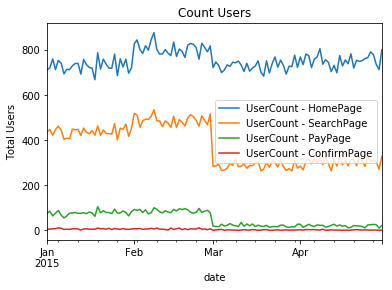

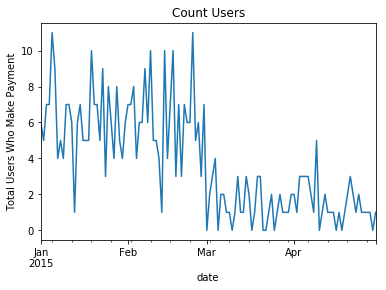

In [96]:

DateCount.plot()
plt.ylabel('Total Users')
plt.title('Count Users')
plt.show()

DateCount['UserCount - ConfirmPage'].plot()
plt.ylabel('Total Users Who Make Payment')
plt.title('Count Users')
plt.show()

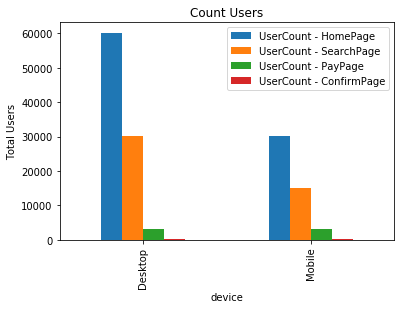

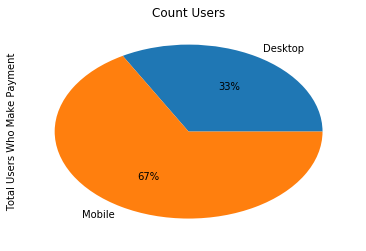

In [97]:
DeviceCount = Funnel[['device', 'HomePage', 'SearchPage', 'PayPage', 'ConfirmPage']].groupby(['device']).agg(['count'])
DeviceCount.columns = ['UserCount - HomePage', 'UserCount - SearchPage', 'UserCount - PayPage', 'UserCount - ConfirmPage']
DeviceCount.plot(kind = 'bar')
plt.ylabel('Total Users')
plt.title('Count Users')
plt.show()

DeviceCount['UserCount - ConfirmPage'].plot(kind = 'pie', autopct='%1.0f%%')
plt.ylabel('Total Users Who Make Payment')
plt.title('Count Users')
plt.show()

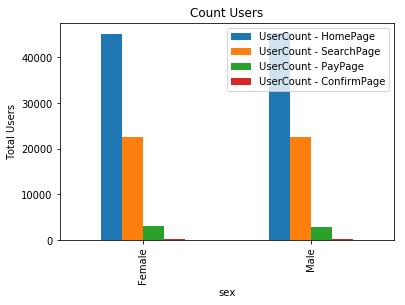

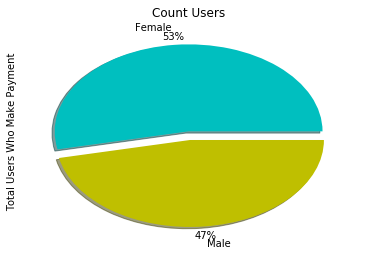

In [98]:
GenderCount = Funnel[['sex', 'HomePage', 'SearchPage', 'PayPage', 'ConfirmPage']].groupby(['sex']).agg(['count'])
GenderCount.columns = ['UserCount - HomePage', 'UserCount - SearchPage', 'UserCount - PayPage', 'UserCount - ConfirmPage']
GenderCount.plot(kind = 'bar')
plt.ylabel('Total Users')
plt.title('Count Users')
plt.show()

colors = ['c', 'y']
explode = (0, 0.1)
GenderCount['UserCount - ConfirmPage'].plot(kind = 'pie', autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2, explode=explode, shadow=True, colors = colors)
plt.ylabel('Total Users Who Make Payment')
plt.title('Count Users')
plt.show()

## Part 1 Conclusion
1. Total user for all pages significantly dropped down since the beginning of May. We need to check what happened both internal and external to identify the reasons.
2. Much more users login the website via Desktop, but more mobile users finally make payment. We need to compare the differences.
3. The gender didn't affect conversion rate.

# Part 2 Funnel Analysis

In [99]:
import plotly.plotly as py
import plotly.figure_factory as ff


In [100]:
import plotly
plotly.tools.set_credentials_file(username='Tropic', api_key='CC7VWMzYuHd3BxuFJ5pE')

In [101]:
data_table = [['Phases', 'Values'],
               ['HomePage', Funnel['HomePage'].count()],
               ['SearchPage', Funnel['SearchPage'].count()],
               ['PayPage', Funnel['PayPage'].count()],
               ['ConfirmPage', Funnel['ConfirmPage'].count()]]

table = ff.create_table(data_table)
py.iplot(table)

In [102]:
import  plotly.plotly  as py
from plotly import graph_objs as go

from __future__ import division

# chart stages data
values = [Funnel['HomePage'].count(), Funnel['SearchPage'].count(), Funnel['PayPage'].count(), Funnel['ConfirmPage'].count()]
phases = ['Home', 'Search', 'Pay', 'Confirm']

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)']

In [103]:
n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)

In [104]:
# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)

In [105]:
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=12
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(203,203,203)'
    ),
    shapes=shapes,
    height=560,
    width=600,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [106]:
# campaign data
df = DeviceCount.T
 
# color for each segment
colors = ['rgb(63,92,128)', 'rgb(90,131,182)']

total = [sum(row[1]) for row in df.iterrows()]
n_phase, n_seg = df.shape

plot_width = 400
unit_width = plot_width / total[0]
 
phase_w = [int(value * unit_width) for value in total]
 
# height of a section and difference between sections 
section_h = 100
section_d = 10

# shapes of the plot
shapes = []
 
# plot traces data
data = []
 
# height of the phase labels
label_y = []

height = section_h * n_phase + section_d * (n_phase-1)

# rows of the DataFrame
df_rows = list(df.iterrows())

# iteration over all the phases
for i in range(n_phase):
    # phase name
    row_name = df.index[i]
    
    # width of each segment (smaller rectangles) will be calculated
    # according to their contribution in the total users of phase
    seg_unit_width = phase_w[i] / total[i]
    seg_w = [int(df_rows[i][1][j] * seg_unit_width) for j in range(n_seg)]
    
    # starting point of segment (the rectangle shape) on the X-axis
    xl = -1 * (phase_w[i] / 2)
    
    # iteration over all the segments
    for j in range(n_seg):
        # name of the segment
        seg_name = df.columns[j]
        
        # corner points of a segment used in the SVG path
        points = [xl, height, xl + seg_w[j], height, xl + seg_w[j], height - section_h, xl, height - section_h]
        path = 'M {0} {1} L {2} {3} L {4} {5} L {6} {7} Z'.format(*points)
        
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[j],
                'line': {
                    'width': 1,
                    'color': colors[j]
                }
        }
        shapes.append(shape)
        
        # to support hover on shapes
        hover_trace = go.Scatter(
            x=[xl + (seg_w[j] / 2)],
            y=[height - (section_h / 2)],
            mode='markers',
            marker=dict(
                size=min(seg_w[j]/2, (section_h / 2)),
                color='rgba(255,255,255,1)'
            ),
            text="Segment : %s" % (seg_name),
            name="Value : %d" % (df[seg_name][row_name])
        )
        data.append(hover_trace)
        
        xl = xl + seg_w[j]

    label_y.append(height - (section_h / 2))

    height = height - (section_h + section_d)

In [107]:
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=df.index.tolist(),
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

data.append(label_trace)
 
# For phase values (total)
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=total,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

data.append(value_trace)



In [108]:
layout = go.Layout(
    title="<b>Segmented Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(230,230,230)'
    ),
    hovermode='closest',
    shapes=shapes,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Analyze Drop Out Rate from Payment Page

The first step of most e-Commerce checkout funnels starts with the cart. The visitor adds a product to the cart and then clicks “Proceed to checkout.”

This first step traditionally sees the largest dropout rate of all steps. According to a Baymard study, 69% of all online customers abandon the cart in their first step, just after adding the product.

When a prospect adds a product to the cart, but does not proceed further, it’s called cart abandonment — and it represents a large issue for e-Commerce retailers. The Baymard study also gives the average rate of shopping cart abandonment in e-Commerce stores as 75%.

The problem with this step in the funnel is that you may not know why the customer added the product to the cart. They might be testing the water, checking the shipping price, or may even have added it by mistake. Without knowing why your prospect did not proceed with checkout, it is hard to improve the entry point.